<a href="https://colab.research.google.com/github/franklinzhou-ncsu/new_repo_554/blob/main/ST_554_Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Subject: ST 554 - Homework 5

Name: Franklin Zhou

Date: 2/24/2026

# Instructions

For this homework you will create a gitHub repo and save a python notebook (`.ipynb` file) using Google Colab there. You'll then submit a link to your gitHub repo. Be sure to:

- change the sharing settings on your notebook. This can be done by clicking on the 'share' icon in the top right. Please make sure to change the sharing settings so that anyone with the link can see the notebook.

- **include markdown text describing what you are doing, even when not explicitly asked for!**

- **save updates you make to your notebook to gitHub as you work through it to earn full credit. No edits should be made after the due date!**

The purpose of this homework is to explore issues around big data including bias in data and models along with practicing SQL skills.


# Part I - Concepts (11 pts)

1. We discussed the “Five V's of Big Data”. Give an example of a place where you've encountered big data or a topic you are interested in where big data would arise. Specifically address the five V's for the example and whether/how they apply to your example. (5 pts)

Answer:

When I wanted to explore the potential effects that would impact student's academic performance across years, I met the five V's situation:

- Volume: I was unable to query the whole data set from Oracle Cloud since it was way too big to download.

- Velocity: Hundreds of thousands data records were generated and recorded daily.

- Variety: The data includes demographics and behaviors of the student: Race, gender, test scores, financial aid status, tutoring center visits, Canvas activity frequency...

- Veracity: The data is not clean and consistant. Missing data everywhere, bad data sometimes troubles me with numerical analysis.

- Value: It's not easy to extract the valuable information from the big data and to make data driven business planning. It requires extensive experience and strong analysis technics to handle big data.


2. Read about the database we'll use below (part IV). Give an example for each letter in the CRUD acronym in the context of this database. (3 pts)



3. What is the purpose of the HAVING clause when writing SQL code? (Recall the sqlitetutorial.net tutorial on the SELECT statement.) (3 pts)

Answer:

The HAVING clause is used to filter grouped results after aggregation is performed. We have to use 'HAVING' after 'GROUP BY'.





# Part II - Simulation of a Sampling Distribution (20 pts)

4. We looked at using simulation to investigate the sampling distribution of $\hat{p}$ in the notes. We'll now look at the sampling distribution of the sample slope from an SLR model using simulation.

- Recall we assume the following model for SLR:

$$
Y_i = \beta_0 + \beta_1x_i + E_i
$$

where the $E_i$ are assumed to be indendent and identically distributed from a Normal distribution with mean 0 and variance $\sigma^2$. Let's assume $\sigma^2 =1$ for simplicity.

- We can generate data from this model by assuming values for $\beta_0$, $\beta_1$, and $n$, along with a sequence of $x$ values via the following code:

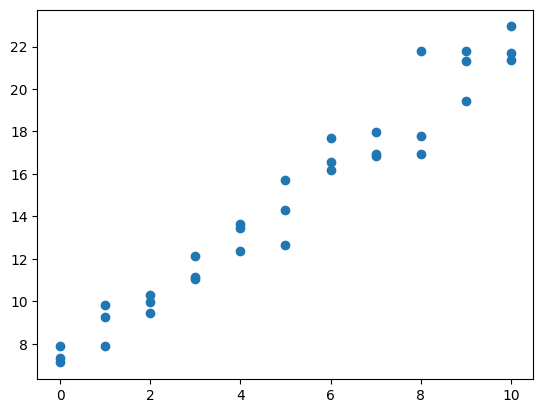

In [1]:
#import some modules needed
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
rng = default_rng(32)
beta_0 = 7
beta_1 = 1.5
# get three 'values' of x at each integer from 0 to 10.
x = np.array(list(np.linspace(start = 0, stop = 10, num = 11))*3)
n = 33
#create the 'responses' modeled from the line plus a random deviation
y = beta_0 + beta_1*x + rng.standard_normal(n)
#visualize the data
plt.scatter(x = x, y = y)
plt.show()


- Now we can use `sklearn` to obtain the estimate for the slope (and save that value) as we did earlier in the course.

- Repeat the above process 5000 times. To be specific: (11 pts)

    - Generate the y values using the code with `rng.standard_normal()`
    - Find the 'best' slope via `sklearn`
    - Save that slope in some object


In [38]:
from sklearn import linear_model
slopes = []

for i in range(5000):
    # get three 'values' of x at each integer from 0 to 10.
    y = beta_0 + beta_1*x + rng.standard_normal(33)
    slr_fit = linear_model.LinearRegression() #Create a reg object
    slr_fit.fit(x.reshape(-1,1), y)
    slopes.append(slr_fit.coef_[0])


- We can use the many values of the sample slope as an approximation to the sampling distribution of the sample slope! Create a histogram of the sample slope values you found. (3 pts)

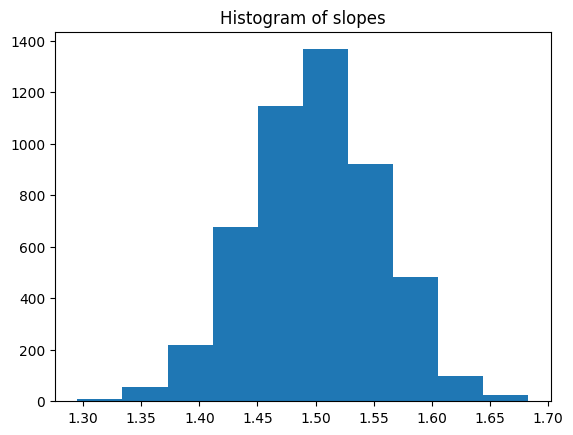

In [39]:
plt.hist(slopes)
plt.title( "Histogram of slopes")
plt.show()

- Use your sampling distribution to approximate the probability of observing a sample slope larger than 1.65. This can be done by looking at the proportion of simulated values larger than 1.65. (3 pts)


In [48]:
prob = sum(1 for i in slopes if i > 1.65) / len(slopes)
print(prob)

0.003


The that the slope is greater than 1.65 is 0.003.

- Give an interpretation of this value and why it might be important for us in relation to a hypothesis test. (3 pts)

This probability represents the probability $P(\hat{\beta}_1 > 1.65) = 0.003$ under true $\beta_1 = 1.5$. If we do a hypothesis testing $H_0: \beta_1 = 1.5$, the probability represents how likely we will observe the slope value at least 1.65.

# Part III - Big Data Examples & Rare Events (14 pts)

5. Consider [this article about bias in machine learning models](https://international-review.icrc.org/articles/biases-machine-learning-big-data-analytics-ihl-implications-913)

- Pick an example in the article and briefly outline the issue around the data used to fit the model. (3 pts)

- Describe how we might augment the data or otherwise account for the bias in that situation. (3 pts)


# Part IV - Querying a database (20 pts)

There is a database file on the assignment link called Lahman.db that is an sqlite database downloaded [from here](https://github.com/jknecht/baseball-archive-sqlite). This database has information on Major League Baseball.





8.
Connect to the database (probably by uploading to Colab) and then look at all of the tables in the database (use read_sql() from pandas to have this returned as a data frame). (2 pts)

In [52]:
import sqlite3
import pandas as pd

con = sqlite3.connect("/content/lahman_1871-2022.sqlite")

get_schema = '''
        SELECT *
        FROM sqlite_schema
        WHERE type = "table";
        '''

pd.read_sql(get_schema, con)

,type,name,tbl_name,rootpage,sql
0,table,AllstarFull,AllstarFull,2,"CREATE TABLE AllstarFull (\nplayerID TEXT,\nye..."
1,table,Appearances,Appearances,3,"CREATE TABLE Appearances (\nyearID INTEGER,\nt..."
2,table,AwardsManagers,AwardsManagers,4,"CREATE TABLE AwardsManagers (\nplayerID TEXT,\..."
3,table,AwardsPlayers,AwardsPlayers,5,"CREATE TABLE AwardsPlayers (\nplayerID TEXT,\n..."
4,table,AwardsShareManagers,AwardsShareManagers,6,CREATE TABLE AwardsShareManagers (\nawardID TE...
5,table,AwardsSharePlayers,AwardsSharePlayers,7,CREATE TABLE AwardsSharePlayers (\nawardID TEX...
6,table,Batting,Batting,8,"CREATE TABLE Batting (\nplayerID TEXT,\nyearID..."
7,table,BattingPost,BattingPost,9,"CREATE TABLE BattingPost (\nyearID INTEGER,\nr..."
8,table,CollegePlaying,CollegePlaying,10,"CREATE TABLE CollegePlaying (\nplayerID TEXT,\..."
9,table,Fielding,Fielding,11,"CREATE TABLE Fielding (\nplayerID TEXT,\nyearI..."


9.
Write an SQL query using pd.read_sql() that returns all the teams that played in the year 2015 with all of the corresponding columns from the Teams table. (2 pts)



10.
Write an SQL query using pd.read_sql() that returns all of the players in the hall of fame, the year they were voted into the hall of fame, and their category - see the HallOfFame table, the inducted variable is important here. (3 pts)



11.
Write an SQL query using pd.read_sql() that return all unique managers of the Pittsburgh Pirates (teamID of PIT) and only that information from the Managers table. Hint: Check out SELECT DISTINCT (3 pts)



12.
Use SQL code and the HallOfFame and Managers tables to return all of the playerIDs for the people that managed for a team that were inducted into the hall of fame. Also, programmatically report the number of such people - this can be done in pandas after returning the data from the call to pd.read_sql(). (4 pts)



13.
Now use the same two tables (HallOfFame and Managers) and an SQL query to return every season managed by each manager that made it to the hall of fame (so do this with an SQL join, not via pd.merge()). You should return the playerID (manager ID), G, W, and L columns from the Managers table.

Second, determine the overall win/loss records (sum of wins and sum of losses) for each of these hall of fame managers. Third, create a new variable that is the win/loss percentage (W/(W+L)). Lastly, sort the resulting data by the win/loss percentage variable (from largest to smallest). The last three parts can be done in pandas with the returned data or you can do it via SQL in your call to pd.read_sql(). (6 pts)
